In [ ]:
# Pendahuluan
# Proyek ini bertujuan untuk memprediksi harga rumah berdasarkan berbagai fitur
# dari dataset yang diberikan. Kita akan menggunakan model Random Forest dan XGBoost
# untuk melakukan prediksi dan membandingkan performanya.

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [ ]:
# Load Dataset
df = pd.read_csv("./train.csv")

In [ ]:
# Eksplorasi Data
print("Ukuran data:", df.shape)
df.head()

Ukuran data: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Info umum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

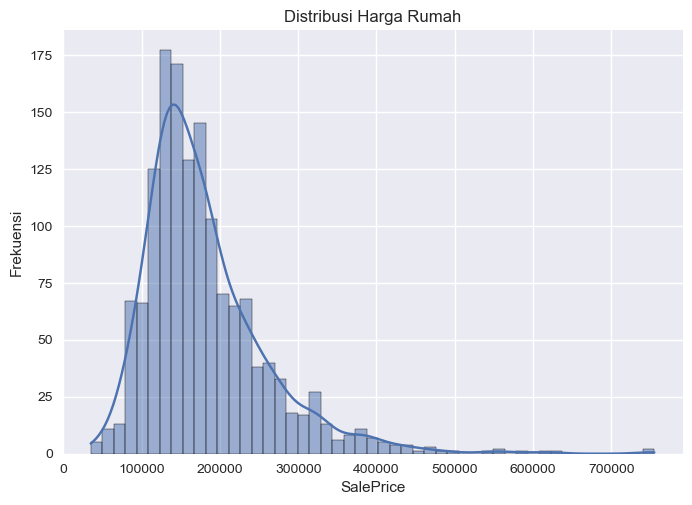

In [ ]:
# Distribusi SalePrice
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribusi Harga Rumah")
plt.xlabel("SalePrice")
plt.ylabel("Frekuensi")
plt.show()

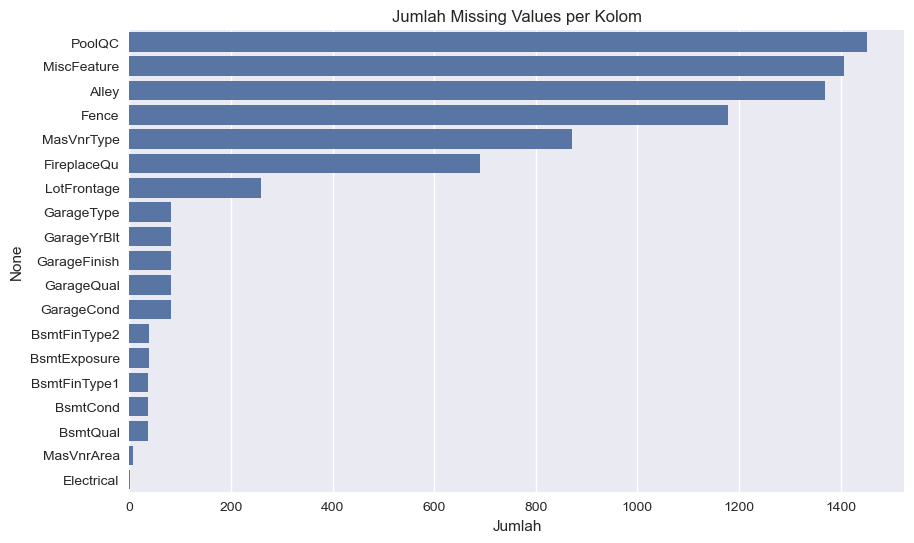

In [ ]:
# Cek Missing Values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=missing.values, y=missing.index)
plt.title("Jumlah Missing Values per Kolom")
plt.xlabel("Jumlah")
plt.show()

In [ ]:
# Praproses Data
# Hapus kolom dengan banyak missing values
threshold = 0.3  # buang kolom dengan >30% missing
df = df.loc[:, df.isnull().mean() < threshold]

In [ ]:
# Hapus Id dan baris yang masih ada missing
df = df.drop(columns=['Id'])
df = df.dropna()

In [ ]:
# One-Hot Encoding untuk kolom kategorikal
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Pisahkan fitur dan target
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model 1: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))

Random Forest
R2 Score: 0.8915178800078768
RMSE: 28566.49025412967


C:\Users\juan1\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Model 2: XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost")
print("R2 Score:", r2_score(y_test, y_pred_xgb))
print("RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))


XGBoost
R2 Score: 0.9020567536354065
RMSE: 27143.446482091127


C:\Users\juan1\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


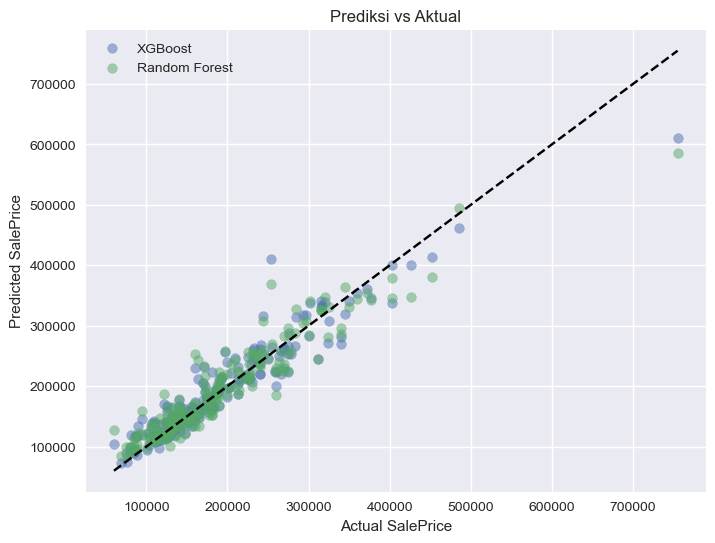

In [ ]:
# Visualisasi Performa
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, label="XGBoost")
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Prediksi vs Aktual")
plt.legend()
plt.show()

In [ ]:
# Feature Importance dari XGBoost
importances = xgb.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

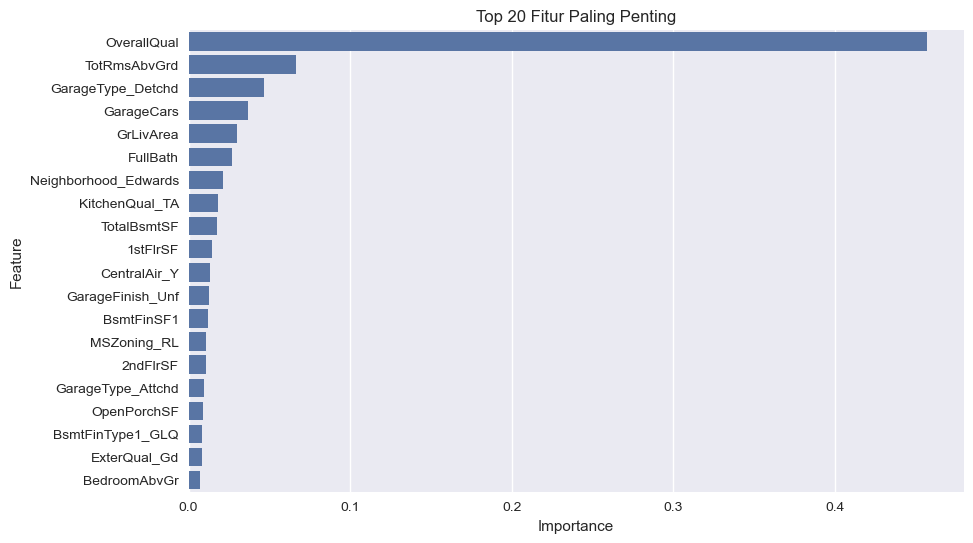

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(20), x='Importance', y='Feature')
plt.title("Top 20 Fitur Paling Penting")
plt.show()

In [ ]:
# 📝 Kesimpulan
# - Kedua model memberikan hasil prediksi yang cukup baik.
# - Fitur paling penting berasal dari OverallQual
# - XGBoost sedikit lebih unggul dibanding Random Forest dalam hal R2 dan RMSE.